# K - Nearest Neighbour

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Dataset

In [2]:
path = '../Dataset/teleCust1000t.csv'
df = pd.read_csv(path)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## About the dataset
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [3]:
df.shape

(1000, 12)

# Data Visualization and Analysis

#### Let’s see how many of each class is in our data set


In [7]:
df["custcat"].value_counts().to_frame()

,custcat
3,281
1,266
4,236
2,217


array([[<AxesSubplot:title={'center':'custcat'}>]], dtype=object)

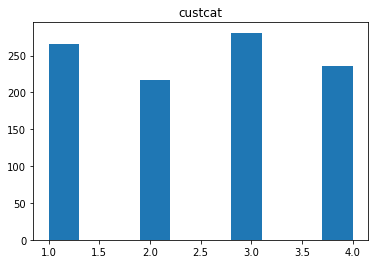

In [14]:
df.hist(column="custcat", grid = False)

### Feature set

Let us define a feature set X

We need to use a numpy array to use Scikit Learn

In [27]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [29]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 
        'ed','employ', 'retire', 'gender', 'reside', 'custcat']].values
X[:4]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.]])

And declare our label:

In [30]:
y = df['custcat']

## Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [31]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit(X).transform(X.astype('float'))
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601, ...,  0.96655883,
        -0.23065004,  0.45813963],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ...,  0.96655883,
        -0.92747794,  1.35119935],
       [ 1.19883553,  1.61477311,  0.58283046, ...,  0.96655883,
        -0.92747794,  0.45813963],
       [ 1.19883553,  0.67796676, -0.45281689, ...,  0.96655883,
         0.46617787, -0.43492008]])

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


<div id="classification">
    <h2>Classification</h2>
</div>


<h2>K nearest neighbor (KNN)</h3>

### Importing library 

In [74]:
from sklearn.neighbors import KNeighborsClassifier

### Training the data

Let us start with K = 4

In [86]:
k = 4

knn = KNeighborsClassifier(n_neighbors=k)
neigh = knn.fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting 

We can use the model to make predictions on the test set:

In [87]:
yhat = knn.predict(X_test)
yhat

array([3, 1, 1, 2, 4, 3, 3, 1, 3, 4, 4, 2, 4, 1, 3, 3, 4, 2, 3, 4, 2, 1,
       1, 4, 4, 3, 3, 1, 4, 2, 1, 1, 4, 4, 3, 3, 3, 2, 3, 3, 1, 4, 1, 1,
       2, 4, 3, 3, 2, 1, 2, 3, 2, 3, 4, 3, 4, 3, 1, 4, 1, 3, 2, 3, 3, 1,
       3, 3, 2, 4, 3, 1, 4, 3, 1, 4, 2, 4, 2, 3, 1, 3, 2, 1, 1, 2, 3, 2,
       1, 3, 3, 2, 3, 1, 4, 1, 4, 1, 1, 3, 3, 1, 3, 3, 4, 4, 2, 1, 2, 4,
       4, 1, 2, 1, 1, 2, 3, 1, 2, 1, 1, 1, 2, 3, 3, 4, 2, 3, 1, 1, 2, 1,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 3, 2, 3, 1, 4, 2, 2, 2, 2, 4, 4, 4, 2,
       2, 3, 1, 3, 3, 2, 3, 1, 1, 3, 1, 4, 4, 1, 3, 2, 1, 3, 4, 2, 4, 2,
       2, 4, 4, 1, 1, 2, 1, 1, 3, 1, 3, 1, 4, 4, 3, 3, 1, 2, 3, 1, 4, 3,
       2, 3], dtype=int64)

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [88]:
from sklearn.metrics import accuracy_score

print("Train Score Accuracy:", accuracy_score(y_train, knn.predict(X_train)))
print("Test Score Accuracy:", accuracy_score(y_test, yhat))

Train Score Accuracy: 0.82875
Test Score Accuracy: 0.735


## Practice

Can you build the model again, but this time with k=6?


In [89]:
k = 6

knn1 = KNeighborsClassifier(n_neighbors=6)

knn1.fit(X_train, y_train)
yhat1 = knn1.predict(X_test)

print("Train Score Accuracy:", accuracy_score(y_train, knn1.predict(X_train)))
print("Test Score Accuracy:", accuracy_score(y_test, yhat1))

Train Score Accuracy: 0.8125
Test Score Accuracy: 0.755


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [103]:
acc = []

for k in range(1,10):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    acc.append(accuracy_score(y_test, KNN.predict(X_test)))
acc

[0.76, 0.68, 0.725, 0.735, 0.73, 0.755, 0.775, 0.77, 0.765]

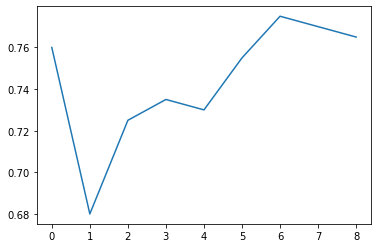

In [107]:
plt.plot(mean_acc)
# plt.xticks(np.arange(1,9,1))
plt.show()

We can see we have maximum accuracy at k = 6, i.e. 0.775